# LLM based evaluation

In [1]:
prompt=f"""
You are a faithful and respectful assistant whose role is that of a evaluator. You will be given a true paragraph and a predicted paragraph and based on the information given,
give a number result from the list [0,1,2,3,4] based on the relevancy of predicted paragraph with the true paragraph.
The definition of each code is given below:
0: Not Relevant: The predicted paragraph does not relate to the true paragraph in any meaningful way. The content, context, or subject matter is completely different.
1: Slightly Relevant: The predicted paragraph has some connection to the true paragraph, but the relevance is minimal. There may be a few overlapping ideas or themes, but they are not clearly aligned.
2: Moderately Relevant: The predicted paragraph shows a fair level of relevance to the true paragraph. It addresses some of the same topics or ideas but may not cover all aspects or may diverge in some significant way.
3: Highly Relevant: The predicted paragraph is closely related to the true paragraph. It reflects the main ideas or themes accurately and addresses the majority of the points discussed in the true paragraph.
4: Perfectly Relevant: The predicted paragraph is entirely relevant to the true paragraph. It aligns perfectly with the content, context, and subject matter, reflecting all the key points accurately.
Note: Your answer should striclty based on one rating from 0 to 4.

"""


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from langchain_community.llms import Ollama

In [3]:
llm=Ollama(model="llama3.1")

true_paragraph=[]
predicted_paragraph=[]
llm_eval=[]
for true,pred in zip(true_paragraph,predicted_paragraph):
    inputs=f"""
    ## True Paragraph: {true}

    ## Predicted Paragraph: {pred}

    ## Output:
    """
    output=llm(prompt+inputs)
    llm_eval.append(output)
    

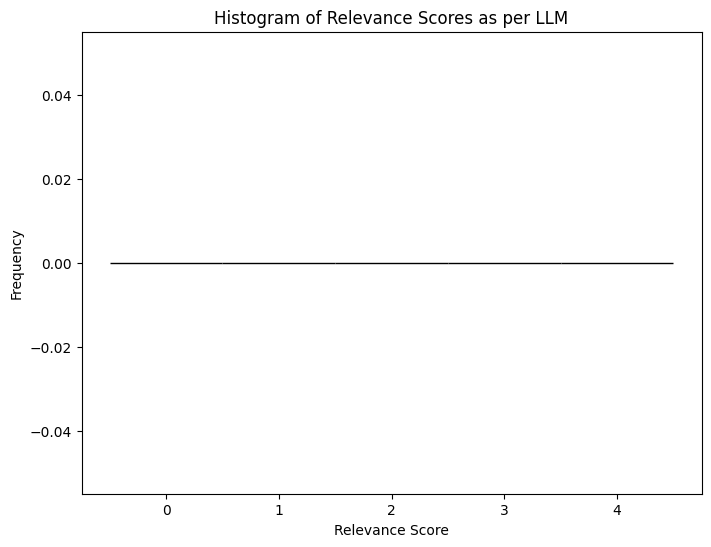

In [4]:
llm_eval=[int(i) for i in llm_eval]
# Plotting the transformed data
plt.figure(figsize=(8, 6))
plt.hist(llm_eval, bins=range(6), edgecolor='black', align='left')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.title('Histogram of Relevance Scores as per LLM')
plt.xticks(range(5))  # Ensure x-ticks match the range of relevance scores
plt.show()

## Plot using Human Evaluation

In [5]:
# human=pd.read_csv("Human_eval.csv")
human=pd.DataFrame(columns=["Rating"])
ratings=list(human.Rating.values)
human_eval=[int(i) for i in ratings]


<Figure size 1000x600 with 0 Axes>

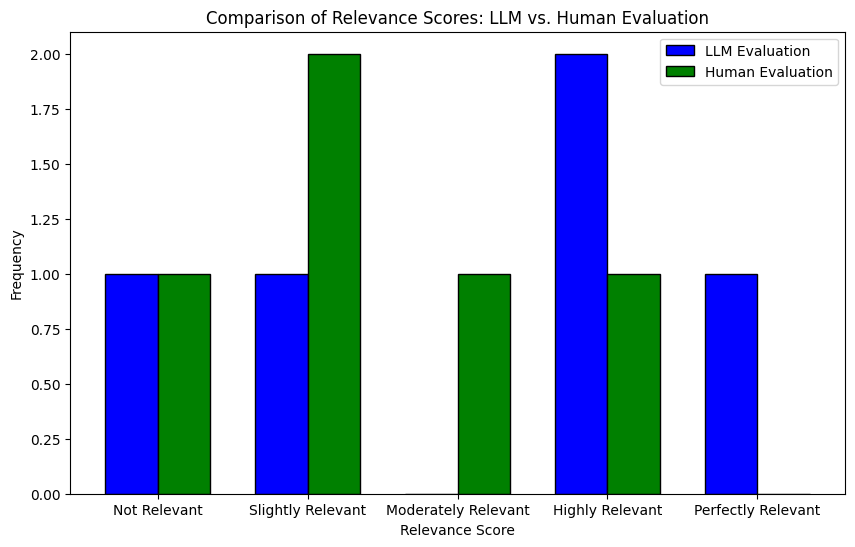

In [6]:
# Plotting the data
plt.figure(figsize=(10, 6))
llm_eval=[1,3,4,3,0]  # for now
human_eval=[2,3,1,1,0]  #for now
# Count occurrences for each score
llm_counts = [llm_eval.count(i) for i in range(5)]
human_counts = [human_eval.count(i) for i in range(5)]
# Define bar width and positions
bar_width = 0.35
index = np.arange(5)  # positions for each score
relevancy=["Not Relevant","Slightly Relevant","Moderately Relevant","Highly Relevant","Perfectly Relevant"]
# Plotting
plt.figure(figsize=(10, 6))

# Bar plots for LLM Evaluation
plt.bar(index - bar_width/2, llm_counts, bar_width, label='LLM Evaluation', color='blue', edgecolor='black')

# Bar plots for Human Evaluation
plt.bar(index + bar_width/2, human_counts, bar_width, label='Human Evaluation', color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.title('Comparison of Relevance Scores: LLM vs. Human Evaluation')
plt.xticks(index,relevancy)  # Set x-ticks to match the scores
plt.legend()
# Display the plot
plt.show()

## Using LLM Metric for evaluation

In [11]:
# %pip install evaluate
# %pip install bert-score

In [40]:
from evaluate import load
bertscore = load("bertscore")
llm_paragraphs = ["apple","orange"]
true_paragraphs = ["black board is not good for health","orange"]
results = bertscore.compute(predictions=llm_paragraphs, references=true_paragraphs, lang="en")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


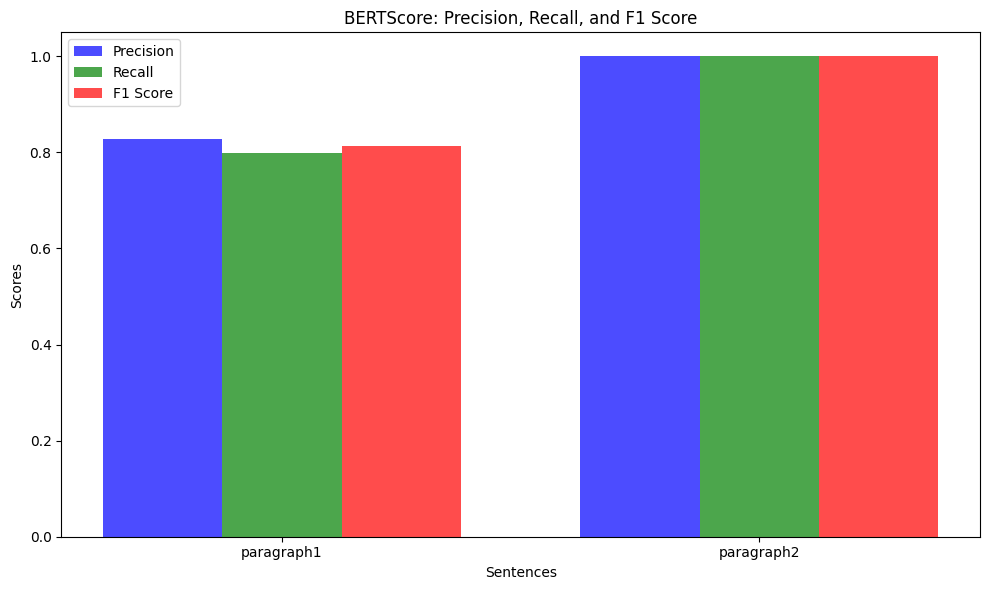

In [42]:
labels=['paragraph1','paragraph2']
#labels=["paragraph"+str(i+1) for i in range(len(true_paragraphs))]
precision = results['precision']
recall = results['recall']
f1 = results['f1']
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Precision, Recall, and F1 scores
bar_width = 0.25
index = range(len(labels))

# Set bar positions
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='b', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], recall, bar_width, label='Recall', color='g', alpha=0.7)
bar3 = ax.bar([i + 2 * bar_width for i in index], f1, bar_width, label='F1 Score', color='r', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Sentences')
ax.set_ylabel('Scores')
ax.set_title('BERTScore: Precision, Recall, and F1 Score')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(labels)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()